In [46]:
#Nama : Rizki Fajar Kurniawan
#NIM : 19/442389/PA/19138

import sympy
import control as co
import control.matlab as mtl
import numpy as np
import matplotlib.pyplot as plt
s = sympy.Symbol('s')

In [47]:
#Transfer function
T = 5
sys = mtl.tf([1], [T, T/16,1])
print(sys)



         1
--------------------
5 s^2 + 0.3125 s + 1



In [48]:
#Kd to transfer function
Kp = 1
Kd = 3
sys_c = mtl.tf([Kp, Kd], [1])
print(sys_c)


s + 3
-----
  1



In [49]:
#interconnection transfer function
sys_p = mtl.series(sys, sys_c)
print(sys_p)


       s + 3
--------------------
5 s^2 + 0.3125 s + 1



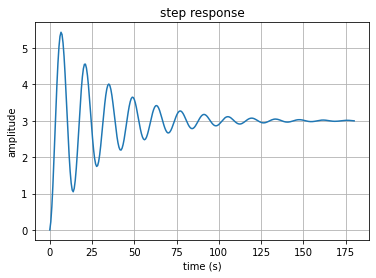

In [50]:
t = np.linspace(0, 180, 300) 
_, y = co.step_response(sys_p, t) 
plt.plot(t, y)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('step response')
plt.grid()


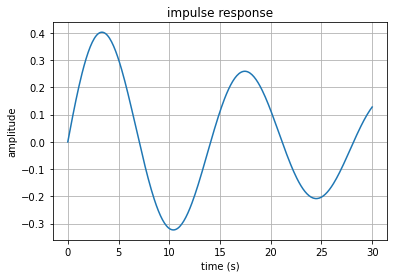

In [51]:
t = np.linspace(0, 30, 300) 
_, y = co.impulse_response(GS, t)
plt.plot(t, y) 
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('impulse response')
plt.grid()


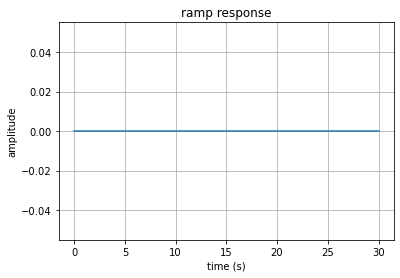

In [52]:
t = np.linspace(0, 30, 300)
_, y = co.forced_response(GS, t) 
plt.plot(t, y) 
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('ramp response')
plt.grid()

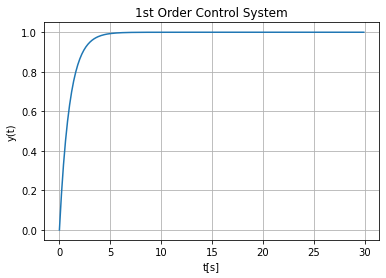

In [53]:
T = 1
start = 0
stop = 30
increment = 0.1
t = np.arange(start, stop, increment)
y = 1-np.exp(-t/T)
plt.plot(t, y)
plt.title('1st Order Control System')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()

In [54]:
def rise_time(a, waktu1, waktu2):
    rt1 = -np.log(waktu1)
    rt2 = -np.log(waktu2)
    return rt1 - rt2
print(rise_time(1, 0.1, 0.9))


2.197224577336219


In [55]:
# Settling time 2%
st = -np.log(0.02)/1
print(st)


3.912023005428146


Text(2.197224577336219, 0.8888888888888888, 'rise time')

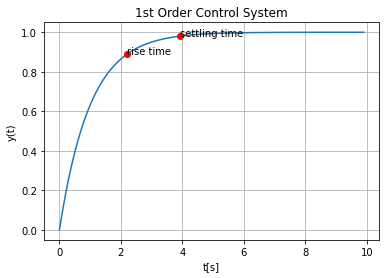

In [56]:
T = 1
start = 0
stop = 10
increment = 0.1
t = np.arange(start, stop, increment)
y = 1-np.exp(-t/T)
j = 1-np.exp(-st/T)
k = 1-np.exp(-rise_time(1, 0.1, 0.9)/T)
plt.plot(t, y)
plt.title('1st Order Control System')
plt.xlabel('t[s]')
plt.ylabel('y(t)')
plt.grid()
plt.plot(st, j, 'ro') # Titik settling time
plt.annotate('settling time', (st, j))
plt.plot(rise_time(1, 0.1, 0.9), k, 'ro') # Titik rise time
plt.annotate('rise time', (rise_time(1, 0.1, 0.9), k))
